### Inicializa Djanfo para correr fuera de su entorno

In [1]:
from django_for_jupyter import  init_django
init_django('covid')
import pandas as   pd
import matplotlib.pyplot as plot

Django Inicializado


### Trabaja con los datos usando el ORM
- Cargo los datos de los registros de llamados en un DataFrame

In [2]:
from registros.models import Registro
item = Registro.objects.all().values()
df = pd.DataFrame(item)
df['mes'] = df['fecha'].dt.strftime('%Y-%m')

### Proceso el DataFeme con cálculos sencillos

#### Muestro DataFrame completo

In [3]:
df

,id,fecha,llamados,sospechosos,descartados,trasladados,derivados,mes
0,1,2020-12-03 00:00:00+00:00,176,4,172,0,0,2020-12
1,2,2020-12-04 00:00:00+00:00,155,6,149,0,3,2020-12
2,3,2020-12-05 00:00:00+00:00,123,18,105,0,4,2020-12
3,4,2020-12-06 00:00:00+00:00,84,14,70,0,1,2020-12
4,5,2020-12-07 00:00:00+00:00,92,1,91,0,0,2020-12
...,...,...,...,...,...,...,...,...
1257,1258,2021-12-09 00:00:00+00:00,58,2,56,0,0,2021-12
1258,1259,2021-12-10 00:00:00+00:00,91,9,82,0,1,2021-12
1259,1260,2021-12-11 00:00:00+00:00,39,1,38,0,0,2021-12
1260,1261,2021-12-12 00:00:00+00:00,54,5,49,0,1,2021-12


#### Totales por mes

In [4]:
sumatoria= df.groupby(df['mes'])[['llamados', 'sospechosos',	'descartados']].sum()
sumatoria

,llamados,sospechosos,descartados
mes,,,
2020-01,906,124,782
2020-02,732,46,686
2020-03,52708,8222,44486
2020-04,29260,7870,21390
2020-05,18940,5022,13918
2020-06,25534,3974,21560
2020-07,18344,3874,14470
2020-08,37110,2550,34560
2020-09,28350,1982,26368


#### Porcentajes de llamados sospechosos

In [5]:
porcentaje = sumatoria
porcentaje['% Sospechosos'] = (porcentaje['sospechosos']*100) / porcentaje['llamados']
porcentaje

,llamados,sospechosos,descartados,% Sospechosos
mes,,,,
2020-01,906,124,782,13.686534
2020-02,732,46,686,6.284153
2020-03,52708,8222,44486,15.599150
2020-04,29260,7870,21390,26.896787
2020-05,18940,5022,13918,26.515312
2020-06,25534,3974,21560,15.563562
2020-07,18344,3874,14470,21.118622
2020-08,37110,2550,34560,6.871463
2020-09,28350,1982,26368,6.991182


### Graficos

Gráfico de barras por Año

In [6]:
df2 = df
df2['year'] = df2['fecha'].dt.strftime('%Y')
sumatoria2= df2.groupby(df['year'])[[ 'sospechosos', 'llamados']].sum()
sumatoria2

,sospechosos,llamados
year,,
2020,35818,252248
2021,9858,239088


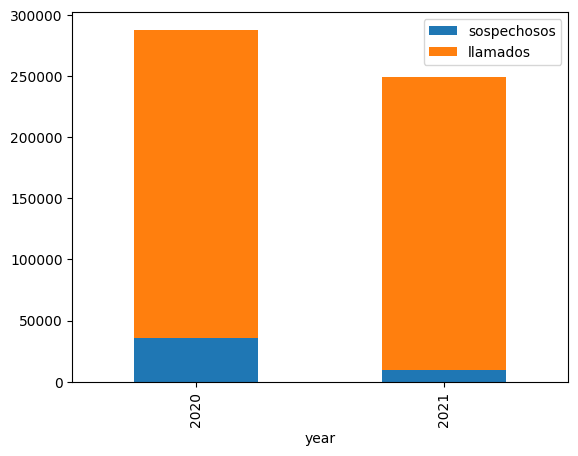

In [7]:
sumatoria2.plot.bar(stacked=True);